# 卷积网络简介
&emsp;&emsp;**卷积网络**(CNN:Convolutional Neural Network)是deep learning技术中机具代表性的技术之一，在图像处理领域拥有很大的发展，很多国际标准的ImageNet数据集上，很多成功的模型都是基于CNN的。相比传统的图像处理算法，CNN避免了对图像复杂的前期预处理过程（提取人工特征等），可以直接输入原始图像。

&emsp;&emsp;这篇文章将介绍两个经典的CNN模型：LeNet和AlexNet，并集合代码进行说明。

## 基础
卷积网络一般有两种类型的网络层：卷积层和池化/采样层，卷积层主要是提取图像的各自特征，池化层主要是对原始特征信号进行抽象，从而大幅度减少训练参数，另外还可以减轻模型过拟合的程度。

### 卷积层
卷积层是卷积核在上一级输入层上通过逐一滑动窗口计算而得，卷积核中的每一个参数都相当于传统神经网络中的权值参数，与对应的局部像素相连接，将卷积核的各个参数与对应的局部像素值相乘之和，（通常还要再加上一个偏置参数），得到卷积层上的结果。如下所示在5\*5的矩阵上进行卷积。

![卷积层](http://i.imgur.com/KPyqPOB.gif)
(图片来自：http://www.jeyzhang.com/cnn-learning-notes-1.html)

### 池化/采样层
通过卷积层获得了图像的特征之后，理论上可以直接使用这些特征训练分类器（如softmax），但是这样做将面临巨大的计算量的挑战，而且容易产生过拟合的现象。为了进一步降低网络训练参数及模型的过拟合程度，我们对卷积层进行池化/采样(Pooling)处理。池化/采样的方式通常有以下两种：

+ Max-Pooling: 选择Pooling窗口中的最大值作为采样值；
+ Mean-Pooling: 将Pooling窗口中的所有值相加取平均，以平均值作为采样值；

具体过程如下：

![pooling](http://deeplearning.stanford.edu/wiki/images/0/08/Pooling_schematic.gif)
(图片来自：http://blog.csdn.net/danieljianfeng/article/details/42433475)

重叠池化（Overlapping Pooling）

![Overlapping_pooling](https://adriancolyer.files.wordpress.com/2017/03/overlapping-pooling.jpeg?w=920)
（图片来自： https://blog.acolyer.org/overlapping-pooling-jpeg/）

### 激活函数层(Activation Layer)
主要作用是讲卷积之后的函数值压缩在一定的范围内，保证每次卷积的之后的数值可控，常见激活函数：

+ sigmoid: 控制输出在[0,1]

$$ f(x) = (1 + e^{-x})^{-1} $$

+ tanh: 控制输出在[-1,1]

$$ f(x) = tanh(x) = \frac{sinh(x)}{cosh(x)} = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$

+ ReLU: 控制输出在[0,正无穷]

$$ f(x) = \max(0, x)$$

### 局部响应归一化（LRN:Local Response Normalization）
神经学中的侧抑制，被激活的神经元抑制相邻神经元。主要使用下述公式，简单思想就是卷积结果计算周围的卷积核在相同位置计算的卷积结果之和，在AlaxNet中发现侧抑制能够增加泛化能力，做平滑处理，识别率提高1%-2%，能够减少top-1 1.4%的错误率以及top-5 1.2%的错误率.公式如下：

$$ b_{x,y}^{i} = \frac{a_{x,y}^{i}}{ (k + \alpha \sum_{j=\max(0,i-n/2)}^{\min(N-1,i+n/2)}(a_{x,y}^i)^2)} $$

其中，$a_{x,y}^{i}$是核 $i$ 对位置 $x,y$ 计算之后的值，N 是该层总共的核的数目。剩下 $k,n,\alpha,\beta$ 为常数，在AlexNet中设置为 $k=2, n=5, \alpha=10^{-4}, \beta = 0.75$。

![LRN](http://shartoo.github.io/images/blog/lrn.jpg)
(图片来自：http://shartoo.github.io/network-imageclassify/)

### DropOut
以一定的概率暂时丢弃神经元，使其不参与向前传递和向后回馈，优点：减少过拟合，加快计算（全连接时，节点很多，耗费大量时间计算）。

![dropOut](https://pic4.zhimg.com/50/v2-82f2ee2c59a843b7ca0b0abbdeaa8923_hd.jpg)
(图片来自：https://zhuanlan.zhihu.com/p/23178423)

## LeNet
LetNet是1998年由LeCun提出的模型，曾经在美国被银行用户手写支票的识别，有很高的正确率。输入的图像大小为32\*32，大于Minist数据集，所以在数据处理的时候需要对28\*28数据周围填充0，主要是将数字的拐角、收尾都集中在图片的中央，主要包含七层模型，用Cx代表卷积层，用Sx代表采样层，用Fx代表全连接层，具体如下：

![LeNet7Layer](http://i.imgur.com/qMs50Ma.png)
(图片来自： http://www.sohu.com/a/134347664_642762)

### 基础设计
**Layer C1:** 通过卷积增强原信号特征，降低噪声干扰。主要是使用6个5\*5的卷积和对输入层进行卷积计算，每个神经单元包含5\*5=25个unit参数和一个bias参数，所以总共包含(25\*25+1)\*6=156个参数，包含156\*28\*28=122304个链接。

**Layer S2:** 池化/采样层，采样max_pool，利用2\*2的pool，最终得到６个１４\*14的特征图，对上层输出进行池化，通过pool乘以一个参数加上一个偏移，所以总共包含(１+1)\*6=12个可训练参数，产生14\*14\*6\*(2\*2+1)=5880个连接。

**Layer C3:** 利用１６个５\*５的卷积核，产生１６个10\*10的特征图。分别为：前６个特征图的输入来自S2的输出的连续的三个子图，接着的６个输入由S2输出的连续的四个子图，接着的三个有S2输出的不连续的四个子图，最后的一个为S2全部的输出图,如下图，最后有6\*(3\*25+1)+6\*(4\*25+1)+3\*(4\*25+1)+1\*(6\*25+1)=1516个可训练参数，产生1516\*10\*10=151600个连接。

![C3Layer](img/C3.png)
(图片来自： http://www.dengfanxin.cn/wp-content/uploads/2016/03/1998Lecun.pdf)

不采用全连接的原因：

+ 不完全连接可以讲连接的数量保持在一定范围内

+ 打破网络的对称性。迫使从不同的输入集合来获取不同的特征

**Layer S4:** 池化，对C3的输出采用２\*2的pool结合max_pool，最后获得１６个５\*５的特征图。有(1+1)\*16个参数，产生(2\*2+1)\*5\*5\*16=2000个连接。

**Layer C5:**: 采用１２０(S4的16个输出任意两个子图，16/2\*15)个卷积核对采用５\*５的卷积核对上层输出进行卷积，输出１２０\*1\*1个特诊图，等同与第四层全连接。主要任为卷积层而不是全连接层是因为如果开始的输入的图大于32\*32，则输出不是1\*1的特征图。可以产生120\*(5\*5\*16+1)=48120个可训练的连接。

**Layer F6:**: 与C5层全连接。产生84个单元，即为７\*12的位图，主要是因为非常符合从ASCII集中取出的字母。过程是对输入加权加偏移，这样就有84\*(120+1)=10164个参数。

**Layer Output:**: 根据欧式径向基函数(RBF: Euclidean Radial Basis Function)，即对84个输入对84个输入参数计算欧氏距离，公式如下:

 $$ y_i = \sum_{j} (x_j - w_{ij})^2 $$

RBF输出越大，离标准输出越远。

### 应用扩展
只是这么简单要应用到银行支票手写识别还远远不够，最终要做到如下的效果：

![ApplyIndustry](http://yann.lecun.com/exdb/lenet/gifs/asamples.gif)
(图片来自： http://yann.lecun.com/exdb/lenet/index.html)

对输入进行切割，识别计算，或者拼接计算，通过GTN结构，大致过程如下：

![Industry](img/Industry.png)
(图片来自：http://www.dengfanxin.cn/wp-content/uploads/2016/03/1998Lecun.pdf)

### 代码实现

In [1]:
#download MNIST data if having no data
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

import tensorflow as tf
import numpy as np

keep_prob=tf.placeholder("float")

def weight_variable(shape):
    #generate initial weight randomly
    initial=tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    #initial bias
    initial=tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

# convolution and pooling
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='VALID')

def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

# convolution and pooling layer
def lenet5_layer(layer,weight,bias):
    W_conv=weight_variable(weight)
    b_conv=bias_variable(bias)

    h_conv=conv2d(layer,W_conv)+b_conv
    return max_pool_2x2(h_conv)

# full connected layer
def dense_layer(layer,weight,bias):
    W_fc=weight_variable(weight)
    b_fc=bias_variable(bias)

    return tf.matmul(layer,W_fc)+b_fc

def main():
    sess=tf.InteractiveSession()
    # input layer
    x=tf.placeholder("float",shape=[None,784])
    y_=tf.placeholder("float",shape=[None,10])

    # first layer
    x_image=tf.pad(tf.reshape(x,[-1,28,28,1]),[[0,0],[2,2],[2,2],[0,0]])
    layer=lenet5_layer(x_image,[5,5,1,6],[6])

    # second layer
    layer=lenet5_layer(layer,[5,5,6,16],[16])

    # third layer
    W_conv3=weight_variable([5,5,16,120])
    b_conv3=bias_variable([120])

    layer=conv2d(layer,W_conv3)+b_conv3
    layer=tf.reshape(layer,[-1,120])

    # all connected layer
    con_layer=dense_layer(layer,[120,84],[84])

    # output
    con_layer=dense_layer(con_layer,[84,10],[10])
    y_conv=tf.nn.softmax(tf.nn.dropout(con_layer,keep_prob))

    ##### train and evalute
    #calculate cross entroy
    cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y_conv))
    #Adam to get better weight and bias to min cross_entropy
    train_step=tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    #get the num of correct prediction
    correct_prediction=tf.equal(tf.argmax(y_conv,1),tf.argmax(y_,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))
    sess.run(tf.global_variables_initializer())
#    for i in range(30000):
    # for quick result
    for i in range(3000):
        #every time get 50 pic to train
        batch=mnist.train.next_batch(50)
        if i%100==0:
            train_accuracy=accuracy.eval(feed_dict={
                x:batch[0],y_:batch[1],keep_prob:1.0
            })
            print("step %d,training accuracy %g"%(i,train_accuracy))
        train_step.run(feed_dict={x:batch[0],y_:batch[1],keep_prob:0.5})

    print("Test accuracy %g"%accuracy.eval(feed_dict={
        x:mnist.test.images,y_:mnist.test.labels,keep_prob:1.0
    }))

if __name__=='__main__':
    main()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0,training accuracy 0.16
step 100,training accuracy 0.54
step 200,training accuracy 0.76
step 300,training accuracy 0.66
step 400,training accuracy 0.76
step 500,training accuracy 0.78
step 600,training accuracy 0.8
step 700,training accuracy 0.8
step 800,training accuracy 0.76
step 900,training accuracy 0.94
step 1000,training accuracy 0.84
step 1100,training accuracy 0.96
step 1200,training accuracy 0.96
step 1300,training accuracy 0.96
step 1400,training accuracy 0.9
step 1500,training accuracy 0.9
step 1600,training accuracy 0.9
step 1700,training accuracy 0.96
step 1800,training accuracy 0.88
step 1900,training accuracy 0.96
step 2000,training accuracy 0.92
step 2100,training accuracy 0.96
step 2200,training accuracy 0.9
step 2300,training accuracy 0.94
step 2400,training accuracy 0.84

## AlexNet
AlexNet是Alex Krizhevsky在ILSVRC-2012比赛中应用的模型，应比赛要求，用来分类12,000,000个图片，图片格式是227\*227，总共1000个label，并在比赛中将Top-5错误率降低到15.3%。

AlexNet总共包含带着不同权值的8层：前5层为卷积层，紧接着3层的全连接层。最后一层运用到一个1000维的softmax函数（归一化指数函数，使得输出限制在[0,1]，以及所有值的和为1），以便产生1000个label，softmax具体公式如下：

$$ \sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}$$

AlexNet结构图如下：
![AlexNet Image](https://www.52ml.net/wp-content/uploads/2016/08/alexnet.png)
(图片来自： http://www.sohu.com/a/134347664_642762)

由于是运行在多GPU机器上所以设计上，将输入分割成两部分卷积到C1。C2, C4 和 C5卷积的输入只是同一个GPU上的前一层的输出，但是C3是C2所有的输出。

最后224\*224\*3的输入经过第一层卷积经过96个11\*11\*3的卷积核，卷积的步幅为4（加快卷积速度，而且4可接受）。第二层采用256个大小为5\*5\*48的卷积核。第三层采用384个大小为3\*3\*256的卷积核，第四层为384个3\*3\*192，第五层为256个3\*3\*192。 全连接除了最后一层都含有4096个神经元。

与LeNet除了层数之外设计不同的是，AlexNet还运用ReLU激活函数，局部反应归一化，重叠池化（overlapping Pooling）(例如采用3\*3的矩形，步幅为2进行池化，能够减少0.4%的Top-1错误了和0.35的Top-5错误率)和丢失层。所以就得到了如下所示的结构图：

![AlexNet_image_with_Pool](http://upload-images.jianshu.io/upload_images/1689929-063fb60285b6ed42.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
(图片来自： http://www.jianshu.com/p/58168fec534d)

即每一层之后都采用ReLu激活函数，C1和C2之后采用LRN进行归一化，C1，C2和C5之后进行重叠池化。全连接层之间采用概率为0.5的随机dropout减少过拟合以及减少。

### 代码实现(参考kratzert的AlexNet)：
由于训练所需要的大量时间，实现将训练产生的参数存储到本地，可以参考http://www.cs.toronto.edu/~guerzhoy/tf_alexnet/

In [2]:
import tensorflow as tf
import numpy as np


class AlexNet(object):


    def __init__(self, x, keep_prob, num_classes, skip_layer,
                 weights_path='DEFAULT'):
        """Create the graph of the AlexNet model.
        Args:
            x: Placeholder for the input tensor.
            keep_prob: Dropout probability.
            num_classes: Number of classes in the dataset.
            skip_layer: List of names of the layer, that get trained from
                scratch
            weights_path: Complete path to the pretrained weight file, if it
                isn't in the same folder as this code
        """
        # Parse input arguments into class variables
        self.X = x
        self.NUM_CLASSES = num_classes
        self.KEEP_PROB = keep_prob
        self.SKIP_LAYER = skip_layer

        if weights_path == 'DEFAULT':
            self.WEIGHTS_PATH = 'bvlc_alexnet.npy'
        else:
            self.WEIGHTS_PATH = weights_path

        # Call the create function to build the computational graph of AlexNet
        self.create()

    def create(self):
        """Create the network graph."""
        # 1st Layer: Conv (w ReLu) -> Lrn -> Pool
        conv1 = conv(self.X, 11, 11, 96, 4, 4, padding='VALID', name='conv1')
        norm1 = lrn(conv1, 2, 2e-05, 0.75, name='norm1')
        pool1 = max_pool(norm1, 3, 3, 2, 2, padding='VALID', name='pool1')
        
        # 2nd Layer: Conv (w ReLu)  -> Lrn -> Pool with 2 groups
        conv2 = conv(pool1, 5, 5, 256, 1, 1, groups=2, name='conv2')
        norm2 = lrn(conv2, 2, 2e-05, 0.75, name='norm2')
        pool2 = max_pool(norm2, 3, 3, 2, 2, padding='VALID', name='pool2')
        
        # 3rd Layer: Conv (w ReLu)
        conv3 = conv(pool2, 3, 3, 384, 1, 1, name='conv3')

        # 4th Layer: Conv (w ReLu) splitted into two groups
        conv4 = conv(conv3, 3, 3, 384, 1, 1, groups=2, name='conv4')

        # 5th Layer: Conv (w ReLu) -> Pool splitted into two groups
        conv5 = conv(conv4, 3, 3, 256, 1, 1, groups=2, name='conv5')
        pool5 = max_pool(conv5, 3, 3, 2, 2, padding='VALID', name='pool5')

        # 6th Layer: Flatten -> FC (w ReLu) -> Dropout
        flattened = tf.reshape(pool5, [-1, 6*6*256])
        fc6 = fc(flattened, 6*6*256, 4096, name='fc6')
        dropout6 = dropout(fc6, self.KEEP_PROB)

        # 7th Layer: FC (w ReLu) -> Dropout
        fc7 = fc(dropout6, 4096, 4096, name='fc7')
        dropout7 = dropout(fc7, self.KEEP_PROB)

        # 8th Layer: FC and return unscaled activations
        self.fc8 = fc(dropout7, 4096, self.NUM_CLASSES, relu=False, name='fc8')

    def load_initial_weights(self, session):
       
        # Load the weights into memory
        weights_dict = np.load(self.WEIGHTS_PATH, encoding='bytes').item()

        # Loop over all layer names stored in the weights dict
        for op_name in weights_dict:

            # Check if layer should be trained from scratch
            if op_name not in self.SKIP_LAYER:

                with tf.variable_scope(op_name, reuse=True):

                    # Assign weights/biases to their corresponding tf variable
                    for data in weights_dict[op_name]:

                        # Biases
                        if len(data.shape) == 1:
                            var = tf.get_variable('biases', trainable=False)
                            session.run(var.assign(data))

                        # Weights
                        else:
                            var = tf.get_variable('weights', trainable=False)
                            session.run(var.assign(data))


def conv(x, filter_height, filter_width, num_filters, stride_y, stride_x, name,
         padding='SAME', groups=1):

    # Get number of input channels
    input_channels = int(x.get_shape()[-1])

    # Create lambda function for the convolution
    convolve = lambda i, k: tf.nn.conv2d(i, k,
                                         strides=[1, stride_y, stride_x, 1],
                                         padding=padding)

    with tf.variable_scope(name) as scope:
        # Create tf variables for the weights and biases of the conv layer
        weights = tf.get_variable('weights', shape=[filter_height,
                                                    filter_width,
                                                    input_channels/groups,
                                                    num_filters])
        biases = tf.get_variable('biases', shape=[num_filters])

    if groups == 1:
        conv = convolve(x, weights)

    # In the cases of multiple groups, split inputs & weights and
    else:
        # Split input and weights and convolve them separately
        input_groups = tf.split(axis=3, num_or_size_splits=groups, value=x)
        weight_groups = tf.split(axis=3, num_or_size_splits=groups,
                                 value=weights)
        output_groups = [convolve(i, k) for i, k in zip(input_groups, weight_groups)]

        # Concat the convolved output together again
        conv = tf.concat(axis=3, values=output_groups)

    # Add biases
    bias = tf.reshape(tf.nn.bias_add(conv, biases), tf.shape(conv))

    # Apply relu function
    relu = tf.nn.relu(bias, name=scope.name)

    return relu


def fc(x, num_in, num_out, name, relu=True):
    """Create a fully connected layer."""
    with tf.variable_scope(name) as scope:

        # Create tf variables for the weights and biases
        weights = tf.get_variable('weights', shape=[num_in, num_out],
                                  trainable=True)
        biases = tf.get_variable('biases', [num_out], trainable=True)

        # Matrix multiply weights and inputs and add bias
        act = tf.nn.xw_plus_b(x, weights, biases, name=scope.name)

    if relu:
        # Apply ReLu non linearity
        relu = tf.nn.relu(act)
        return relu
    else:
        return act


def max_pool(x, filter_height, filter_width, stride_y, stride_x, name,
             padding='SAME'):
    """Create a max pooling layer."""
    return tf.nn.max_pool(x, ksize=[1, filter_height, filter_width, 1],
                          strides=[1, stride_y, stride_x, 1],
                          padding=padding, name=name)


def lrn(x, radius, alpha, beta, name, bias=1.0):
    """Create a local response normalization layer."""
    return tf.nn.local_response_normalization(x, depth_radius=radius,
                                              alpha=alpha, beta=beta,
                                              bias=bias, name=name)


def dropout(x, keep_prob):
    """Create a dropout layer."""
    return tf.nn.dropout(x, keep_prob)

训练利用训练模型为图片进行预测，结果如下：

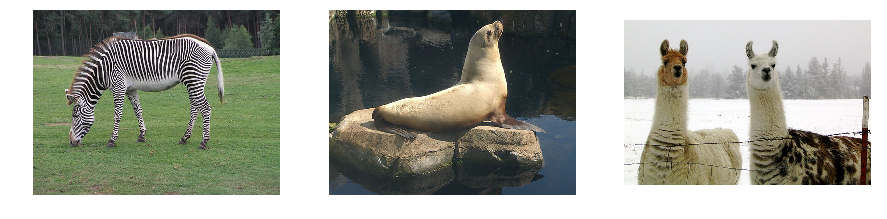

In [3]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt


#mean of imagenet dataset in BGR
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)

current_dir = os.getcwd()
image_dir = os.path.join(current_dir, 'images')
#get list of all images
img_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpeg')]
imgs=[]
#load all images
for f in img_files:
    imgs.append(Image.open(f))
    
%matplotlib inline 
#plot images
fig = plt.figure(figsize=(15,6))
for i, img in enumerate(imgs):
    fig.add_subplot(1,3,i+1)
    plt.imshow(img)
    plt.axis('off')

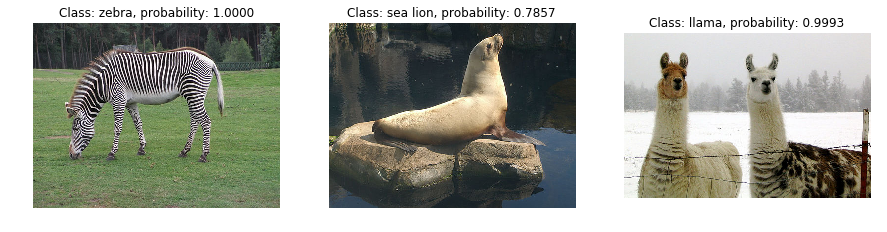

In [4]:
from alexnet import AlexNet
from caffe_classes import class_names

#placeholder for input and dropout rate
x = tf.placeholder(tf.float32, [1, 227, 227, 3])
keep_prob = tf.placeholder(tf.float32)

#create model with default config ( == no skip_layer and 1000 units in the last layer)
model = AlexNet(x, keep_prob, 1000, [])

#define activation of last layer as score
score = model.fc8

#create op to calculate softmax 
softmax = tf.nn.softmax(score)

with tf.Session() as sess:
    
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    softmax
    # Load the pretrained weights into the model
    model.load_initial_weights(sess)
    
    # Create figure handle
    fig2 = plt.figure(figsize=(15,6))

    # Loop over all images
    for i, image in enumerate(imgs):
        
        # Convert image to float32 and resize to (227x227)#
        img = image.resize( ( 227, 227),resample=Image.LANCZOS)
        
        # Subtract the ImageNet mean
        img -= imagenet_mean
        
        # Reshape as needed to feed into model
        img = img.reshape((1,227,227,3))
        
        # Run the session and calculate the class probability
        probs = sess.run(softmax, feed_dict={x: img, keep_prob: 1})
        
        # Get the class name of the class with the highest probability
        class_name = class_names[np.argmax(probs)]
        
        # Plot image with class name and prob in the title
        fig2.add_subplot(1,3,i+1)
        plt.imshow(image)
        plt.title("Class: " + class_name + ", probability: %.4f" %probs[0,np.argmax(probs)])
        plt.axis('off')

利用向前传递和反馈自动调整参数，由于比赛用的数据庞大，这里只用部分数据(这里用钉子，nail进行测试，coffee_class_ID:678)进行简单测试，有兴趣尝试ImageNet ILSVRC2012全部图片，可以参考https://pan.baidu.com/s/1dDizyed#list/path=%2FImageNet

In [1]:
import os
import numpy as np
from alexnet import AlexNet
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt


#mean of imagenet dataset in BGR
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)
label=[0 for i in range(1000)]
label[677]=1
sess=tf.InteractiveSession()

current_dir = os.getcwd()
image_dir = os.path.join(current_dir, 'ImageNet')
#get list of all images
img_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.JPEG')]
#placeholder for input and dropout rate
x = tf.placeholder(tf.float32, [None, 227, 227, 3])
keep_prob = tf.placeholder(tf.float32)
y_= tf.placeholder("float",shape=[None,1000])
#create model with default config ( == no skip_layer and 1000 units in the last layer)
model = AlexNet(x, keep_prob, 1000, [])

#define activation of last layer as score
score = model.fc8

#create op to calculate softmax 
softmax = tf.nn.softmax(score)    
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=softmax))
#Adam to get better weight and bias to min cross_entropy
train_step=tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#get the num of correct prediction
correct_prediction=tf.equal(tf.argmax(softmax,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))
sess.run(tf.global_variables_initializer())
image_10=[]
j=0
for i in range(1000):
    # Convert image to float32 and resize to (227x227)#
    img = Image.open(img_files[i]).resize( ( 227, 227),resample=Image.LANCZOS)
    # Subtract the ImageNet mean
    img -= imagenet_mean
        
    # Reshape as needed to feed into model
    img = img.reshape((227,227,3))
    image_10.append(img)
    if (i+1)%50==0 and i>0:
        train_accuracy=accuracy.eval(feed_dict={
            x:image_10,y_:[label for i in range(50)],keep_prob:1.0
        })
        print("step %d,training accuracy %g"%(i,train_accuracy))
        train_step.run(feed_dict={x:image_10,y_:[label for i in range(50)],keep_prob:0.5})
        image_10.clear()

step 49,training accuracy 0
step 99,training accuracy 0.56
step 149,training accuracy 0.89
step 199,training accuracy 0.99
step 249,training accuracy 1
step 299,training accuracy 1
step 349,training accuracy 1
step 399,training accuracy 1
step 449,training accuracy 1
step 499,training accuracy 1
step 549,training accuracy 1
step 599,training accuracy 1
step 649,training accuracy 1
step 699,training accuracy 1
step 749,training accuracy 1
step 799,training accuracy 1
step 849,training accuracy 1
step 899,training accuracy 1
step 949,training accuracy 1
step 999,training accuracy 1


 
# 参考文献：
LeNet:　http://www.dengfanxin.cn/wp-content/uploads/2016/03/1998Lecun.pdf

AlexNet: https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

我看AlexNet: http://www.jianshu.com/p/58168fec534d

池化方法总结： http://blog.csdn.net/danieljianfeng/article/details/42433475